In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_graph(b, name):
    w, h = signal.freqz(b)
    w_n = w/max(w)
    h_n = 20 * np.log10 (abs(h))
   
    plt.plot(w_n,h_n, label=f'{name}')
    plt.legend()
    plt.ylabel("Magnitude (db)")
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(r'Frequency response')

In [4]:
def filter_analyse(b, fpass, fstop, attenuation):
    result = True
    w, h = signal.freqz(b)
    w_n = w/max(w)
    h_n = 20 * np.log10 (abs(h))

    for x, y in zip(w_n, h_n):
        if x < fpass:
            if y < -6:
                print(x, y)
                return False
        if x > fstop and y > -attenuation:
            print(x, y)
            return False

    return True

In [5]:
def get_filter(f_pass, f_stop, att, wind):
    n = 1
    h = signal.firwin(n, f_pass, pass_zero = 'lowpass', window = wind)
    while not filter_analyse(h, f_pass, f_stop, att):
        n += 1
        h = signal.firwin(n, f_pass,  pass_zero = 'lowpass', window = wind)

    return h, n

In [14]:
f_pass = 4 * 10**6;
f_stop = 6 * 10**6;
f_s = 20 * 10**6;
atten = 40;
f_pass_norm = 2 * f_pass/ f_s
f_stop_norm = 2 * f_stop / f_s
h, n = get_filter(f_pass_norm, f_stop_norm, atten, 'hamming')

0.6007827788649707 0.0
0.6007827788649707 -4.608295465729199
0.6007827788649707 -1.322811214008929
0.6007827788649707 -5.906167817901801
0.6007827788649707 -8.242871921969252
0.6007827788649707 -10.596757408838258
0.6007827788649707 -13.138989945173094
0.6007827788649707 -15.529030595744251
0.6007827788649707 -17.50389209305931
0.6007827788649707 -19.52029019401583
0.6007827788649707 -22.140680349359734
0.6007827788649707 -25.087086897858658
0.6007827788649707 -27.647060687266574
0.6007827788649707 -30.353298523946997
0.6007827788649707 -34.63301608643236


In [15]:
n

16

In [16]:
h_round = np.zeros(len(h))
h_coefs = list()
h_signs = list()
# h_rounded_last = zeros(1, length(h));

In [17]:
h_round

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
#Multiplying and dividing a number by 2 is equivalent to shifting. 
#For code simplicity, it was decided to work with them.
h_round = np.zeros(len(h))
h_coefs = list()
h_signs = list()
cur_coef = 0
order = 11

for i in range(len(h)):
    #Init values, 
    pow_list = []
    cur_elem = h[i]
    sign = 1 if cur_elem > 0 else -1
    cur_pow, res_val = 0, 0
    #We have information about sign, and now for the 
    # simplicity we can get absolute values
    cur_elem = abs(cur_elem)
    cur_elem_cp = cur_elem
    
    #While we have free bits
    while cur_pow > -order:
        
        #If our number less our minimal value, then
        # set it as our minimal and skip
        if 2**-order > cur_elem:
            pow_list.append(-order)
            res_val = 2**(-order)
            break
            
        #if cur_elem_cp >= 1, then after shift it greater,
        #than bit on 0 position is 1
        while (cur_elem_cp) < 1:
            cur_pow -= 1
            cur_elem_cp *= 2
            if cur_pow == -order:
                break
                
        cur_elem_cp -= 1
        pow_list.append(cur_pow)
        res_val += 2**(pow_list[-1])
        
               
    h_round[i] = sign * res_val
    h_coefs.append(pow_list)

0.00048828125  -  1.2459352202272148e-18
0.00537109375  -  0.005571502753586114
0.00830078125  -  0.007889558417819378
-0.01611328125  -  -0.016521997384434998
-0.05126953125  -  -0.05080560271276461
0.00048828125  -  1.1992126494686934e-17
0.18408203125  -  0.18387171313704825
0.36962890625  -  0.36999482578874593
0.36962890625  -  0.36999482578874593
0.18408203125  -  0.18387171313704825
0.00048828125  -  1.1992126494686937e-17
-0.05126953125  -  -0.05080560271276463
-0.01611328125  -  -0.016521997384434998
0.00830078125  -  0.007889558417819385
0.00537109375  -  0.005571502753586117
0.00048828125  -  1.2459352202272148e-18


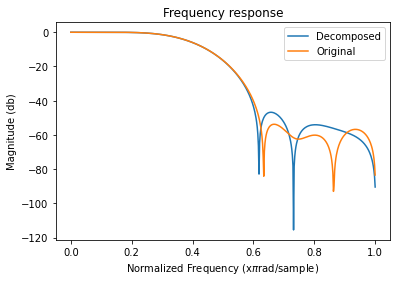

In [19]:
plot_graph(h_round, 'Decomposed')
plot_graph(h, 'Original')
# print(h - h_round)
# h_coefs

for i in range(len(h)):
    print(h_round[i],' - ', h[i])
    